# A analysis framework for diabetes complecation predictions.

## Case 2: Predict the Immunoglobulin A Nephropathy risk for diabetes patients

In [1]:
from DiabetesComplecationPrediction.datasets import *
from DiabetesComplecationPrediction.preprocessing import *
from DiabetesComplecationPrediction.trained_model import SVMModel, RFModel, CatBoostModel

### Load the data

In [2]:
df_igan = diabetes_IgAN_risk()

In [3]:
df_igan.head()

,Age,Sex,Body height at 0M,Waist circumstances at 0M,Duration of T2DM,Smoking habit,Drinking habit,History of complications,History of hypertension,History of dyslipidemia,...,Urinary sugar at 3M,Urinary sugar at 12M,Urinary albumin/creatinine ratio at 0M,Urinary albumin/creatinine ratio at 3M,Urinary albumin/creatinine ratio at 12M,eGFR at 0M,eGFR at 1M,eGFR at 3M,eGFR at 12M,Risk of Nephropathy
0,61.0,1.0,170.0,101.0,72.0,0.0,0.0,1.0,1.0,1.0,...,NaN,0.0,53.3,NaN,6.4,55.940643,52.670513,50.686818,61.643003,0.0
1,42.0,1.0,184.0,NaN,36.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,64.0,1.0,169.0,NaN,168.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,57.0,1.0,168.5,NaN,144.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,63.0,2.0,151.0,88.5,72.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,30.0,27.1,56.6,77.754106,87.433453,89.274571,83.961202,1.0


In [4]:
df_igan.isnull().sum()

Age                             1
Sex                             1
Body height  at 0M             14
Waist circumstances at 0M     312
Duration of T2DM               66
                             ... 
eGFR at 0M                     89
eGFR at 1M                    136
eGFR at 3M                    135
eGFR at 12M                   155
Risk of Nephropathy             1
Length: 165, dtype: int64

### Check the missing rate

In [5]:
del_feature = Del_Feature()

In [6]:
igan_missing = del_feature.missing_rate(df_igan)
igan_missing

,missing_rate
Proinsulin/Insulin at 12M,78.305520
Insulin at 12M.1,77.920411
CPI at 12M,77.920411
Proinsulin at 12M,77.920411
C-peptide at 12M,77.792041
...,...
History of myocardial infarction,0.128370
History of cerebral infarction,0.128370
History of angina pectoris,0.128370
History of heart failure,0.128370


### Plot the missing rate histogram

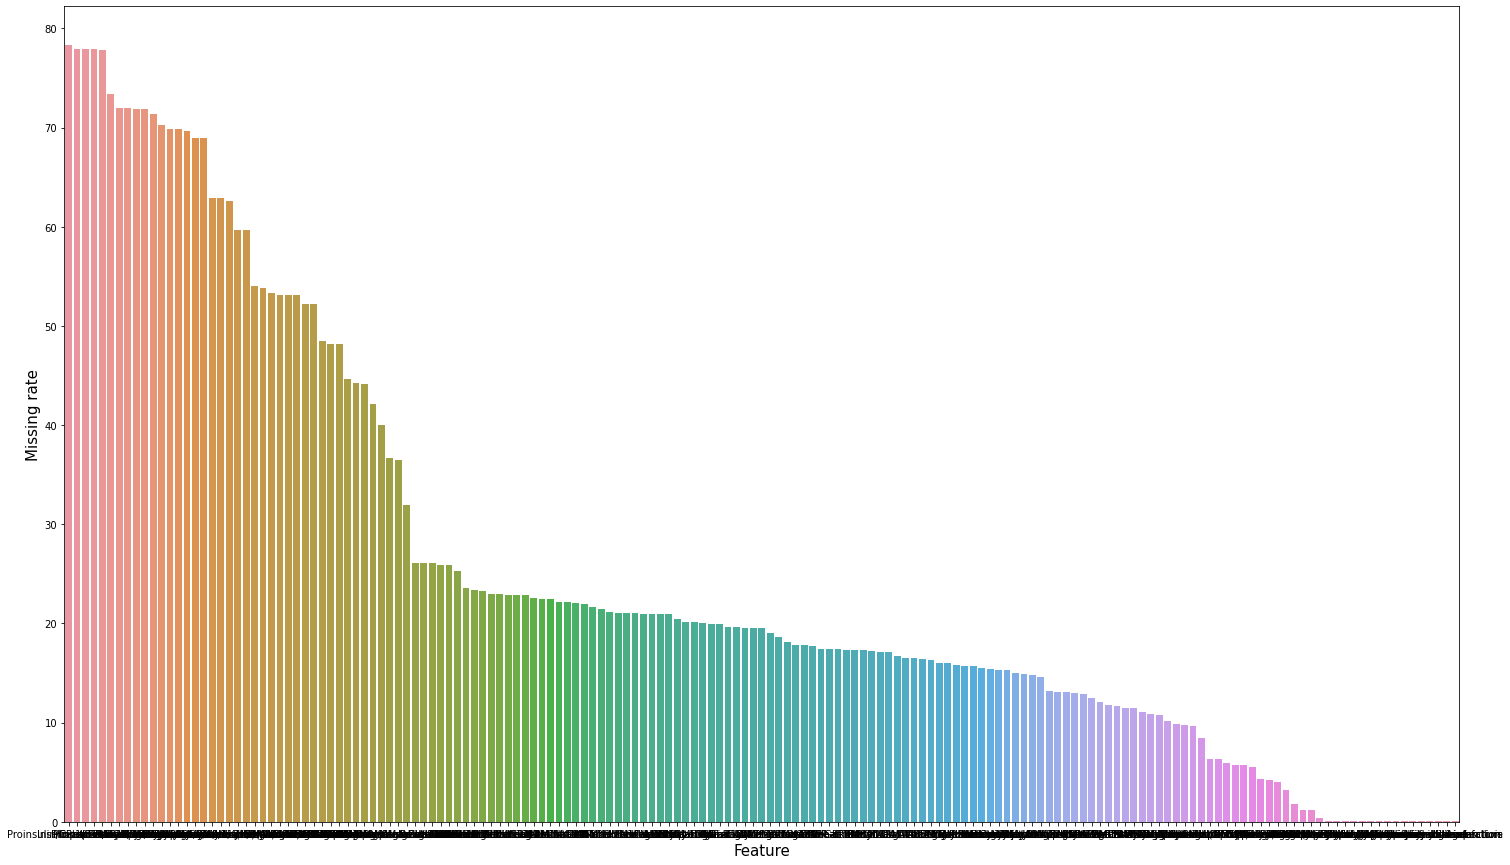

In [7]:
del_feature.missing_rate_hist(df_igan)

### Delete features with missing rate high than 30%

In [8]:
df_igan = del_feature.del_feature(df_igan, igan_missing)

In [9]:
df_igan.isnull().sum()

Age                      1
Sex                      1
Body height  at 0M      14
Duration of T2DM        66
Smoking habit           31
                      ... 
eGFR at 0M              89
eGFR at 1M             136
eGFR at 3M             135
eGFR at 12M            155
Risk of Nephropathy      1
Length: 124, dtype: int64

In [10]:
df_igan = df_igan[df_igan['Risk of Nephropathy'].notnull()]

### Inpute the rest missing values with mean

In [11]:
df_igan = normal_impute(df_igan)

In [12]:
df_igan.isnull().sum()

Age                    0
Sex                    0
Body height  at 0M     0
Duration of T2DM       0
Smoking habit          0
                      ..
eGFR at 0M             0
eGFR at 1M             0
eGFR at 3M             0
eGFR at 12M            0
Risk of Nephropathy    0
Length: 124, dtype: int64

### Generate feature list based on correlation

In [13]:
feature_igan = Feature(df_igan, 'Risk of Nephropathy')
feature_igan

In [14]:
feature_list_igan = feature_igan.feature_list()
feature_list_igan

['History of angina pectoris',
 'History of kidney disease',
 'Creatinine at 0M ',
 'Triglyceride at 3M',
 'Creatinine at 3M ',
 'Systolic blood pressure at 0M ',
 'History of hypertension',
 'Urinary protein at 1M',
 'History of retinopathy',
 'Triglyceride at 12M',
 'Systolic blood pressure at 12M ',
 'Creatinine at 1M ',
 'Age',
 'LDL-C at 12M',
 'BUN at 0M',
 'Urinary protein at 3M',
 'Urinary protein at 0M',
 'History of liver disease',
 'K at 12M',
 'BUN at 3M']

### Encode the target column

In [15]:
df_igan = encode_categ(df_igan, 'Risk of Nephropathy')

### Fit the catboost model

In [16]:
cb_igan = CatBoostModel(df_igan, 
                        feature_list_igan,
                        'Risk of Nephropathy')

In [17]:
igan_cb_model = cb_igan.trained_model()

Learning rate set to 0.007944
0:	learn: 0.6910548	total: 54ms	remaining: 53.9s
1:	learn: 0.6889603	total: 55.1ms	remaining: 27.5s
2:	learn: 0.6867814	total: 56.3ms	remaining: 18.7s
3:	learn: 0.6853373	total: 57.4ms	remaining: 14.3s
4:	learn: 0.6835509	total: 58.5ms	remaining: 11.6s
5:	learn: 0.6820872	total: 59.6ms	remaining: 9.87s
6:	learn: 0.6802733	total: 60.6ms	remaining: 8.59s
7:	learn: 0.6782470	total: 61.6ms	remaining: 7.64s
8:	learn: 0.6764611	total: 62.6ms	remaining: 6.9s
9:	learn: 0.6746661	total: 63.5ms	remaining: 6.28s
10:	learn: 0.6729821	total: 64.3ms	remaining: 5.78s
11:	learn: 0.6712701	total: 65.1ms	remaining: 5.36s
12:	learn: 0.6697609	total: 65.9ms	remaining: 5s
13:	learn: 0.6679745	total: 66.6ms	remaining: 4.69s
14:	learn: 0.6664120	total: 67.4ms	remaining: 4.43s
15:	learn: 0.6651229	total: 68.6ms	remaining: 4.22s
16:	learn: 0.6635967	total: 69.4ms	remaining: 4.01s
17:	learn: 0.6617576	total: 70.2ms	remaining: 3.83s
18:	learn: 0.6604258	total: 71ms	remaining: 3.67s


### Evaluate the catboost model

In [18]:
cb_igan_accu = cb_igan.model_accuracy(igan_cb_model)
cb_igan_accu

74.78632478632478

In [19]:
cb_igan_roc = cb_igan.roc(igan_cb_model)
cb_igan_roc

0.6235835351089588

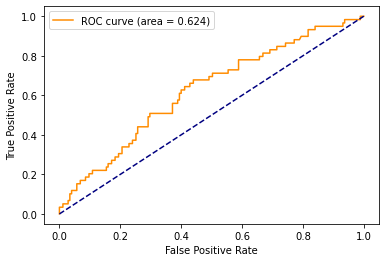

In [20]:
cb_igan.roc_plot(igan_cb_model)

### Fit the random forest model

In [21]:
rf_igan = RFModel(df_igan,
                  feature_list_igan,
                  'Risk of Nephropathy')

In [22]:
rf_igan_model = rf_igan.trained_model()

### Evaluate the random forest model

In [23]:
rf_igan.model_accuracy()

71.36752136752136

In [24]:
rf_igan.roc()

0.48600521669341895

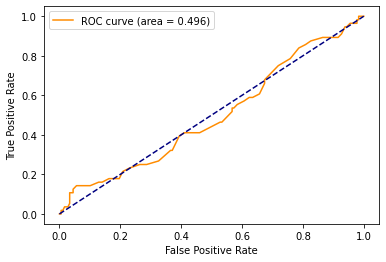

In [25]:
rf_igan.roc_plot()

### Predict using random forest model

In [2]:
igan_pre = load_csv('DiabetesComplecationPrediction/datasets/data/igan_exm.csv')
igan_pre = igan_pre.set_index(' ')

In [4]:
from DiabetesComplecationPrediction.information import IgAN_checker_csv
IgAN_checker_csv(igan_pre, 'Random Forest') #error since dtype